In [72]:
%matplotlib inline
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix 

# Import any other libraries you may need such as
# average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

In [2]:
performances = pd.read_csv('performances.csv')

In [3]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


### Exercise

In [102]:
# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(ground_truth, probability):
    fpr, tpr, thresholds = roc_curve(ground_truth, probability)
    plt.figure(figsize = (10, 7))
    plt.plot(fpr, tpr)
    plt.title('2-class ROC curve')
    
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(ground_truth, probability):
    precision, recall, thresholds = precision_recall_curve(ground_truth, probability)
    plt.figure(figsize = (10, 7))
    plt.step(recall, precision)
    plt.title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(np.average(precision)))

# function to calculate the F1 score
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)



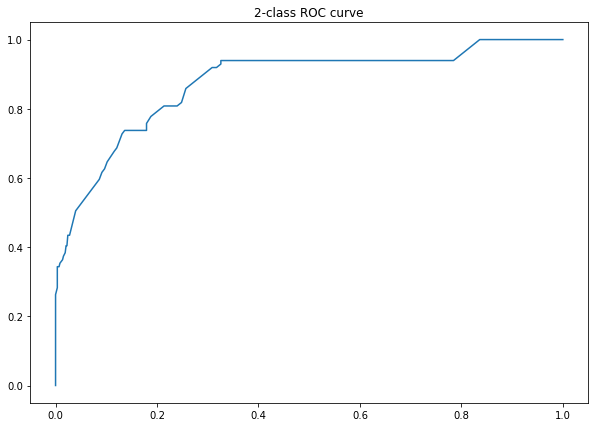

In [103]:
plot_roc_curve(performances['ground_truth'],performances['probability'])

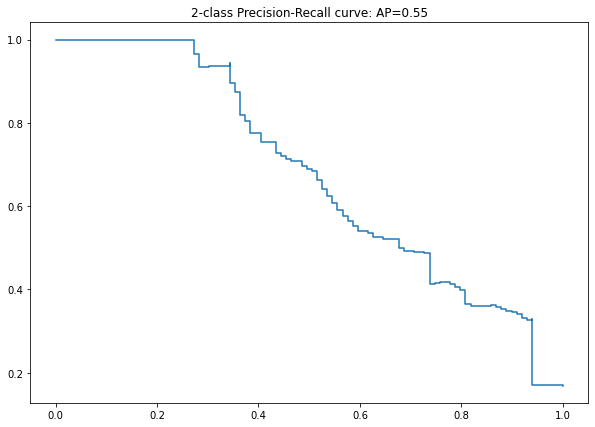

In [104]:
plot_precision_recall_curve(performances['ground_truth'],performances['probability'])

### Calculate F1 Score
Calculate F1 score for two different scenarios here, 
1. Choose a threshold that favors precision, 
2. Choose a threshold that favors recall

Print the precision, recall, threshold, and F1 score for each scenario. 

In [49]:
precision, recall, thresholds = precision_recall_curve(performances['ground_truth'],performances['probability'])
thresholds

array([0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16,
       0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.25, 0.26, 0.27, 0.28,
       0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39,
       0.4 , 0.41, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [66]:
# For a case of High precision and low recall
cut_off = 0.79
i = (np.abs(thresholds - cut_off)).argmin()
print("The precision for cutoff:", cut_off, " is: ", precision[i])
print("The recall for cutoff:", cut_off, " is: ", recall[i])
print("The F1 score is: ", calc_f1(precision[i], recall[i]))

The precision for cutoff: 0.79  is:  0.8043478260869565
The recall for cutoff: 0.79  is:  0.37373737373737376
The F1 score is:  0.5103448275862069


In [67]:
# For a case of High recall and low precision
cut_off = 0.35
i = (np.abs(thresholds - cut_off)).argmin()
print("The precision for cutoff:", cut_off, " is: ", precision[i])
print("The recall for cutoff:", cut_off, " is: ", recall[i])
print("The F1 score is: ", calc_f1(precision[i], recall[i]))

The precision for cutoff: 0.35  is:  0.365296803652968
The recall for cutoff: 0.35  is:  0.8080808080808081
The F1 score is:  0.5031446540880504


### Examine the _accuracy_ under the two scenarios
Now look at what the _accuracy_ of our model would be using those two threshold values. **Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.**

Print the _accuracy_ in both the cases, and think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

The Accuracy of the Algorithm is: 0.8954344624447718


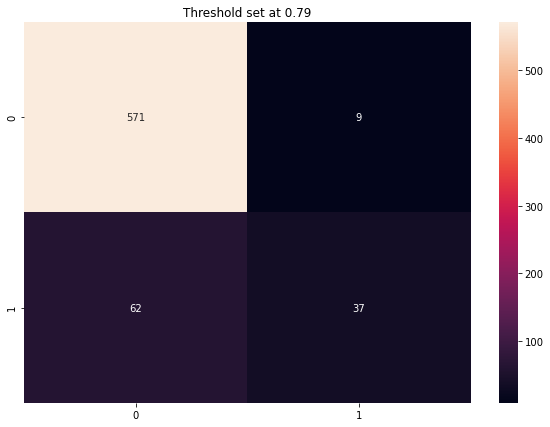

In [107]:
performances["co_0.79"] = np.where(performances.probability >= 0.79, 1, 0)
tn, fp, fn, tp = confusion_matrix(performances.ground_truth, performances["co_0.79"]).ravel()
cf_matrix = confusion_matrix(performances.ground_truth, performances["co_0.79"])
plt.figure(figsize = (10, 7))
plt.title("Threshold set at 0.79")
sns.heatmap(cf_matrix, annot=True, fmt = 'd')

Accuracy = (tp + tn) / (tp + fp + fn + tn)
print("The Accuracy of the Algorithm is:", Accuracy)

The Accuracy of the Algorithm is: 0.7673048600883653


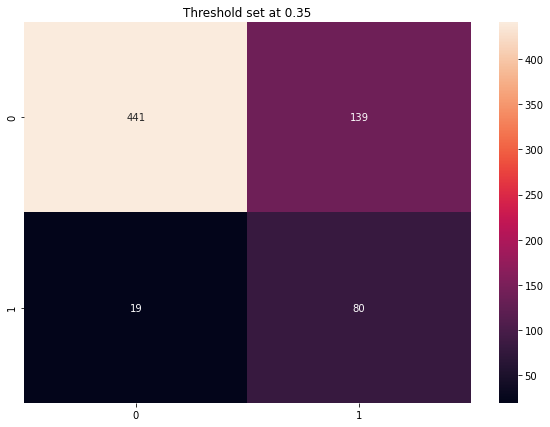

In [106]:
performances["co_0.35"] = np.where(performances.probability >= 0.35, 1, 0)
tn, fp, fn, tp = confusion_matrix(performances.ground_truth, performances["co_0.35"]).ravel()
cf_matrix = confusion_matrix(performances.ground_truth, performances["co_0.35"])
plt.figure(figsize = (10, 7))
plt.title("Threshold set at 0.35")
sns.heatmap(cf_matrix, annot=True, fmt = 'd')

Accuracy = (tp + tn) / (tp + fp + fn + tn)
print("The Accuracy of the Algorithm is:", Accuracy)